In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_valid = pd.read_csv('../data/val.csv')

In [3]:
df_train_encoded = df_train.copy()
categorical_features = ['Gender', 'H_Cal_Consump',
 'Alcohol_Consump', 'Smoking',
 'Food_Between_Meals', 'Fam_Hist',
 'H_Cal_Burn', 'Phys_Act', 'Transport']
for feature in categorical_features:
 le = LabelEncoder()
 df_train_encoded[feature] = le.fit_transform(df_train_encoded[feature])


df_train_encoded['Body_Level'] = df_train_encoded['Body_Level'].map({'Body Level 1':1,
                                                                     'Body Level 2':2,
                                                                     'Body Level 3':3,
                                                                     'Body Level 4':4})

df_valid_encoded = df_valid.copy()
for feature in categorical_features:
    le = LabelEncoder()
    df_valid_encoded[feature] = le.fit_transform(df_valid_encoded[feature])

df_valid_encoded['Body_Level'] = df_valid_encoded['Body_Level'].map({'Body Level 1':1,
                                                                     'Body Level 2':2,
                                                                     'Body Level 3':3,
                                                                     'Body Level 4':4})

In [4]:
# Create and fit a GMM for each class
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))

In [5]:
# Compute the posterior probabilities for a new data point

posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))


              precision    recall  f1-score   support

           1       0.97      0.94      0.96        34
           2       0.76      0.88      0.81        42
           3       0.91      0.51      0.66        80
           4       0.81      0.98      0.89       140

    accuracy                           0.83       296
   macro avg       0.86      0.83      0.83       296
weighted avg       0.85      0.83      0.82       296



## Experimentation

Will test out the change in accuracy due to changing several parameters

In [18]:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 1,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 0.005,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [20]:
# From the list of parameters above, I'll change 
n_components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
covariance_type = ['full', 'tied', 'diag', 'spherical']
reg_covar = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
n_init = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
# Test out specific combinations of parameters
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='full',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        34
           2       0.70      0.90      0.79        42
           3       0.90      0.65      0.75        80
           4       0.88      0.98      0.93       140

    accuracy                           0.86       296
   macro avg       0.87      0.85      0.85       296
weighted avg       0.88      0.86      0.86       296



In [25]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='full',reg_covar=0.0001, n_init=4)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        34
           2       0.70      0.90      0.79        42
           3       0.90      0.65      0.75        80
           4       0.88      0.98      0.93       140

    accuracy                           0.86       296
   macro avg       0.87      0.85      0.85       296
weighted avg       0.88      0.86      0.86       296



In [27]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=7, covariance_type='full',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.76      0.56      0.64        34
           2       0.55      0.26      0.35        42
           3       0.57      0.59      0.58        80
           4       0.80      0.96      0.87       140

    accuracy                           0.72       296
   macro avg       0.67      0.59      0.61       296
weighted avg       0.70      0.72      0.69       296



In [28]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=2, covariance_type='full',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.42      0.79      0.55        42
           3       0.85      0.51      0.64        80
           4       0.81      0.99      0.89       140

    accuracy                           0.72       296
   macro avg       0.52      0.57      0.52       296
weighted avg       0.67      0.72      0.67       296



/home/jimbo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jimbo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jimbo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=3, covariance_type='full',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.67      0.06      0.11        34
           2       0.57      0.31      0.40        42
           3       0.54      0.86      0.67        80
           4       0.96      0.98      0.97       140

    accuracy                           0.75       296
   macro avg       0.68      0.55      0.54       296
weighted avg       0.76      0.75      0.71       296



In [30]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='full',reg_covar=0.0001, n_init=10)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        34
           2       0.70      0.90      0.79        42
           3       0.90      0.65      0.75        80
           4       0.88      0.98      0.93       140

    accuracy                           0.86       296
   macro avg       0.87      0.85      0.85       296
weighted avg       0.88      0.86      0.86       296



In [31]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='tied',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        34
           2       0.70      0.90      0.79        42
           3       0.90      0.65      0.75        80
           4       0.88      0.98      0.93       140

    accuracy                           0.86       296
   macro avg       0.87      0.85      0.85       296
weighted avg       0.88      0.86      0.86       296



In [32]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='diag',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.60      0.88      0.71        34
           2       0.50      0.40      0.45        42
           3       0.67      0.20      0.31        80
           4       0.71      0.96      0.82       140

    accuracy                           0.67       296
   macro avg       0.62      0.61      0.57       296
weighted avg       0.66      0.67      0.62       296



In [33]:
gmms = {}
for label in np.unique(df_train_encoded['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='spherical',reg_covar=0.0001, n_init=1)
    gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))
predicted_labels = np.argmax(posterior_probs, axis=1) + 1
print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        80
           4       0.47      1.00      0.64       140

    accuracy                           0.47       296
   macro avg       0.12      0.25      0.16       296
weighted avg       0.22      0.47      0.30       296



/home/jimbo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jimbo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jimbo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bias Variance Tradeoff

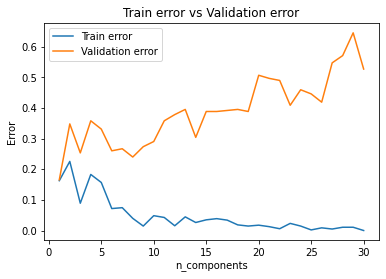

In [6]:
# Get train & validation errors for n_components from 1 to 31
train_errors = []
valid_errors = []
for n_components in range(1, 31):
    # Create and fit a GMM for each class
    gmms = {}
    for label in np.unique(df_train_encoded['Body_Level']):
        gmms[label] = GaussianMixture(n_components=n_components)
        gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop(['Body_Level'], axis=1))

    # Compute the posterior probabilities for a new data point
    posterior_probs = np.zeros((len(df_train_encoded), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(df_train_encoded.drop('Body_Level', axis=1))

    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    train_errors.append(np.mean(predicted_labels != df_train_encoded['Body_Level']))

    posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    valid_errors.append(np.mean(predicted_labels != df_valid_encoded['Body_Level']))

# Plot the train & validation errors
import matplotlib.pyplot as plt
plt.plot(range(1, 31), train_errors, label='Train error')
plt.plot(range(1, 31), valid_errors, label='Validation error')
plt.title('Train error vs Validation error')
plt.xlabel('n_components')
plt.ylabel('Error')
plt.legend()
plt.show()

## Observations

This bias variance tradeoff plot looks more like the ones we took in our lectures, as the n_components increases, the model complexity increases, which leads to less training errors but more validation error (less bias but more variance). and the generalization performance of the mo|del decreases because of that.

## Class Imbalance

In [7]:
# Try out all the other Datasets in class_imbalance folder
x_train_undersampled = pd.read_csv('../data/class_Imbalance/X_under_sampled_no_relationship.csv')
y_train_undersampled = pd.read_csv('../data/class_Imbalance/y_under_sampled_no_relationship.csv')

x_train_oversampled = pd.read_csv('../data/class_Imbalance/X_over_sampled_no_relationship.csv')
y_train_oversampled = pd.read_csv('../data/class_Imbalance/y_over_sampled_no_relationship.csv')

x_train_smotenc = pd.read_csv('../data/class_Imbalance/X_SMOTENC_no_relationship.csv')
y_train_smotenc = pd.read_csv('../data/class_Imbalance/y_SMOTENC_no_relationship.csv')

y_train_smotenc = y_train_smotenc.rename(columns={'Body_Level_Num': 'Body_Level'})
y_train_smotenc['Body_Level'] = y_train_smotenc['Body_Level'].map({1: 'Body Level 1', 2: 'Body Level 2', 3: 'Body Level 3', 4: 'Body Level 4'})


x_train_smote_with_importance = pd.read_csv('../data/class_Imbalance/X_SMOTE_with_importance.csv')
y_train_smote_with_importance = pd.read_csv('../data/class_Imbalance/y_SMOTE_with_importance.csv')

y_train_smote_with_importance = y_train_smote_with_importance.rename(columns={'Body_Level_Num': 'Body_Level'})

y_train_smote_with_importance['Body_Level'] = y_train_smote_with_importance['Body_Level'].map({1: 'Body Level 1', 2: 'Body Level 2', 3: 'Body Level 3', 4: 'Body Level 4'})


In [8]:
# Print the number of samples in each class for each dataset
print('Number of samples in each class for x_train_undersampled')
print(y_train_undersampled['Body_Level'].value_counts())
print('Number of samples in each class for x_train_oversampled')
print(y_train_oversampled['Body_Level'].value_counts())
print('Number of samples in each class for x_train_smotenc')
print(y_train_smotenc['Body_Level'].value_counts())
print('Number of samples in each class for x_train_smote_with_importance')
print(y_train_smote_with_importance['Body_Level'].value_counts())

Number of samples in each class for x_train_undersampled
Body Level 1    135
Body Level 2    135
Body Level 3    135
Body Level 4    135
Name: Body_Level, dtype: int64
Number of samples in each class for x_train_oversampled
Body Level 3    472
Body Level 2    472
Body Level 4    472
Body Level 1    472
Name: Body_Level, dtype: int64
Number of samples in each class for x_train_smotenc
Body Level 3    472
Body Level 2    472
Body Level 4    472
Body Level 1    472
Name: Body_Level, dtype: int64
Number of samples in each class for x_train_smote_with_importance
Body Level 4    177564
Body Level 3    106839
Body Level 1     53419
Body Level 2     50786
Name: Body_Level, dtype: int64


In [9]:
# Encode categorical features
x_train_undersampled_encoded = x_train_undersampled.copy()
x_train_oversampled_encoded = x_train_oversampled.copy()
x_train_smotenc_encoded = x_train_smotenc.copy()
x_train_smote_with_importance_encoded = x_train_smote_with_importance.copy()

for feature in categorical_features:
    le = LabelEncoder()
    x_train_undersampled_encoded[feature] = le.fit_transform(x_train_undersampled_encoded[feature])
    x_train_oversampled_encoded[feature] = le.fit_transform(x_train_oversampled_encoded[feature])
    x_train_smotenc_encoded[feature] = le.fit_transform(x_train_smotenc_encoded[feature])
    x_train_smote_with_importance_encoded[feature] = le.fit_transform(x_train_smote_with_importance_encoded[feature])

In [10]:
# Undersampled Data
gmms = {}
for label in np.unique(y_train_undersampled['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1)
    gmms[label].fit(x_train_undersampled_encoded[y_train_undersampled['Body_Level'] == label])

# Compute the posterior probabilities for a new data point
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

predicted_labels = np.argmax(posterior_probs, axis=1) + 1

print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.97      0.94      0.96        34
           2       0.76      0.90      0.83        42
           3       0.86      0.70      0.77        80
           4       0.89      0.94      0.92       140

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296



In [11]:
# Oversampled Data
gmms = {}
for label in np.unique(y_train_oversampled['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1)
    gmms[label].fit(x_train_oversampled_encoded[y_train_oversampled['Body_Level'] == label])

# Compute the posterior probabilities for a new data point
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

predicted_labels = np.argmax(posterior_probs, axis=1) + 1

print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       0.97      0.94      0.96        34
           2       0.77      0.88      0.82        42
           3       0.91      0.53      0.67        80
           4       0.81      0.98      0.89       140

    accuracy                           0.84       296
   macro avg       0.87      0.83      0.83       296
weighted avg       0.85      0.84      0.83       296



In [12]:
# SMOTENC Data
gmms = {}
for label in np.unique(y_train_smotenc['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1)
    gmms[label].fit(x_train_smotenc_encoded[y_train_smotenc['Body_Level'] == label])

# Compute the posterior probabilities for a new data point
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

predicted_labels = np.argmax(posterior_probs, axis=1) + 1

print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))

              precision    recall  f1-score   support

           1       1.00      0.79      0.89        34
           2       0.73      0.86      0.79        42
           3       0.88      0.56      0.69        80
           4       0.81      0.98      0.89       140

    accuracy                           0.83       296
   macro avg       0.86      0.80      0.81       296
weighted avg       0.84      0.83      0.82       296



In [13]:
# SMOTE with importance Data
gmms = {}
for label in np.unique(y_train_smote_with_importance['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1)
    gmms[label].fit(x_train_smote_with_importance_encoded[y_train_smote_with_importance['Body_Level'] == label])

# Compute the posterior probabilities for a new data point
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

predicted_labels = np.argmax(posterior_probs, axis=1) + 1

print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))


              precision    recall  f1-score   support

           1       0.97      0.85      0.91        34
           2       0.79      0.79      0.79        42
           3       0.84      0.78      0.81        80
           4       0.91      0.97      0.94       140

    accuracy                           0.88       296
   macro avg       0.87      0.85      0.86       296
weighted avg       0.88      0.88      0.88       296



In [37]:
# SMOTE with importance Data with Best parameters
gmms = {}
for label in np.unique(y_train_smote_with_importance['Body_Level']):
    gmms[label] = GaussianMixture(n_components=1, covariance_type='full', reg_covar=0.0001, n_init=1)
    gmms[label].fit(x_train_smote_with_importance_encoded[y_train_smote_with_importance['Body_Level'] == label])

# Compute the posterior probabilities for a new data point
posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
for i, (label, gmm) in enumerate(gmms.items()):
    posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

predicted_labels = np.argmax(posterior_probs, axis=1) + 1

print(classification_report(df_valid_encoded['Body_Level'], predicted_labels))


              precision    recall  f1-score   support

           1       0.96      0.79      0.87        34
           2       0.74      0.81      0.77        42
           3       0.84      0.85      0.84        80
           4       0.95      0.96      0.95       140

    accuracy                           0.89       296
   macro avg       0.87      0.85      0.86       296
weighted avg       0.89      0.89      0.89       296



## Observations

It's clear that undersampling as well as smotenc with importance are the best. & the f1-score for each class reflects the number of data points for each class in the dataset. (In the Smote with importance, class 4 is the most numerous and it has the highest recall, but a little lower in precision).

## Regularization

100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


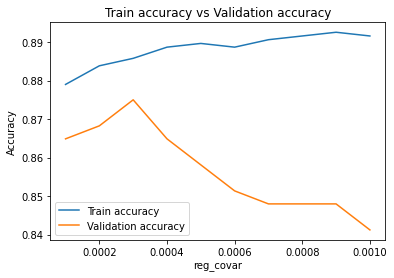

In [14]:
# Test the effect of regularization on the model
# Will use the original data for this

# Get the accuracies for different regularization values
train_accuracies = []
valid_accuracies = []

for reg in tqdm(np.linspace(0.1, 1, 10)):
    # Create and fit a GMM for each class
    gmms = {}
    for label in np.unique(df_train_encoded['Body_Level']):
        gmms[label] = GaussianMixture(n_components=1, reg_covar=reg * 1e-3)
        gmms[label].fit(df_train_encoded[df_train_encoded['Body_Level'] == label].drop('Body_Level', axis=1))

    # Compute the posterior probabilities for a new data point
    posterior_probs = np.zeros((len(df_train_encoded), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(df_train_encoded.drop('Body_Level', axis=1))

    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    train_accuracies.append(np.mean(predicted_labels == df_train_encoded['Body_Level']))

    posterior_probs = np.zeros((len(df_valid_encoded), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(df_valid_encoded.drop('Body_Level', axis=1))

    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    valid_accuracies.append(np.mean(predicted_labels == df_valid_encoded['Body_Level']))

# Plot the train & validation errors
plt.plot(np.linspace(0.1, 1, 10) * 1e-3, train_accuracies, label='Train accuracy')
plt.plot(np.linspace(0.1, 1, 10) * 1e-3, valid_accuracies, label='Validation accuracy')
plt.title('Train accuracy vs Validation accuracy')
plt.xlabel('reg_covar')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Observations

It's clear that regularization does have an effect on the accuracy of the model, to a certain extent, regularization can be beneficial, but after a certain point, it reduces the validation accuracy & leads to worse generalization.

I'm not sure how to interpret these results, as I understand, since both train & validation accuracies increase initially, this means that the model was initially a little overfitted but regularization helped. Then the model becomes underfit & this leads to worse validation accuracy. I'm not sure why the train accuracy increases though.

## Learning Curve

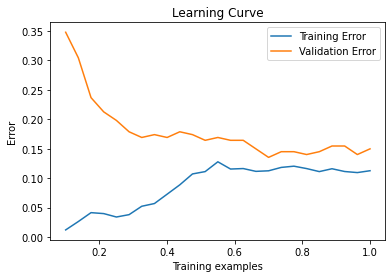

In [15]:
# Set the training set sizes
train_sizes = np.linspace(0.1, 1.0, 25)

# Initial split of the data
X_TRAIN, X_valid, Y_TRAIN, y_valid = train_test_split(
        df_train_encoded.drop('Body_Level', axis=1),
        df_train_encoded['Body_Level'],
        train_size=0.8,
        stratify=df_train_encoded['Body_Level'],
        random_state=42
    )

# Initialize lists to store the accuracies
train_errors = []
valid_errors = []

# Compute the accuracies for different training set sizes
for train_size in train_sizes:
    # Split the data into training and validation sets
    if train_size == 1.0:
        X_train = X_TRAIN
        y_train = Y_TRAIN
    else:
        X_train = X_TRAIN.sample(frac=train_size, random_state=42)
        y_train = Y_TRAIN.loc[X_train.index]

    # Create and fit a GMM for each class
    gmms = {}
    for label in np.unique(y_train):
        gmms[label] = GaussianMixture(n_components=1, reg_covar=reg * 1e-3)
        gmms[label].fit(X_train[y_train == label])

    # Compute the posterior probabilities for the training data
    posterior_probs = np.zeros((len(X_train), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(X_train)

    # Compute the training error
    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    train_errors.append(np.mean(predicted_labels != y_train))

    # Compute the posterior probabilities for the validation data
    posterior_probs = np.zeros((len(X_valid), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(X_valid)

    # compute the validation error
    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    valid_errors.append(np.mean(predicted_labels != y_valid))


# Plot the learning curve
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, valid_errors, label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

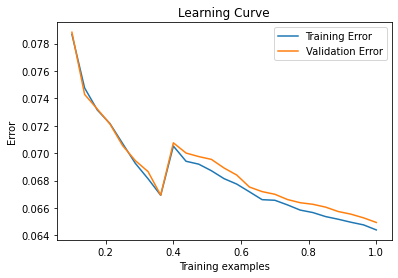

In [16]:
# Set the training set sizes
train_sizes = np.linspace(0.1, 1.0, 25)

# Initial split of the data
X_TRAIN, X_valid, Y_TRAIN, y_valid = train_test_split(
        x_train_smote_with_importance_encoded,
        y_train_smote_with_importance['Body_Level'].map({'Body Level 1':
         1, 'Body Level 2': 2, 'Body Level 3': 3, 'Body Level 4': 4,}),
        train_size=0.8,
        stratify=y_train_smote_with_importance['Body_Level'].map({'Body Level 1':
         1, 'Body Level 2': 2, 'Body Level 3': 3, 'Body Level 4': 4,}),
        random_state=42
    )

# Initialize lists to store the accuracies
train_errors = []
valid_errors = []

# Compute the accuracies for different training set sizes
for train_size in train_sizes:
    # Split the data into training and validation sets
    if train_size == 1.0:
        X_train = X_TRAIN
        y_train = Y_TRAIN
    else:
        X_train = X_TRAIN.sample(frac=train_size, random_state=42)
        y_train = Y_TRAIN.loc[X_train.index]

    # Create and fit a GMM for each class
    gmms = {}
    for label in np.unique(y_train):
        gmms[label] = GaussianMixture(n_components=1)
        gmms[label].fit(X_train[y_train == label])

    # Compute the posterior probabilities for the training data
    posterior_probs = np.zeros((len(X_train), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(X_train)

    # Compute the training error
    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    train_errors.append(np.mean(predicted_labels != y_train))

    # Compute the posterior probabilities for the validation data
    posterior_probs = np.zeros((len(X_valid), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(X_valid)

    # compute the validation error
    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    valid_errors.append(np.mean(predicted_labels != y_valid))


# Plot the learning curve
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, valid_errors, label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

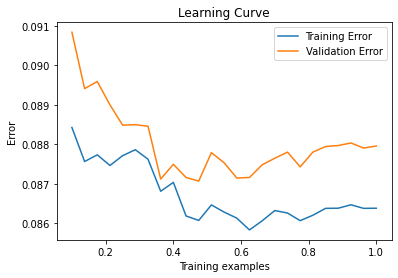

In [17]:
# Set the training set sizes
train_sizes = np.linspace(0.1, 1.0, 25)

# Initial split of the data
X_TRAIN, X_valid, Y_TRAIN, y_valid = train_test_split(
        x_train_smote_with_importance_encoded,
        y_train_smote_with_importance['Body_Level'].map({'Body Level 1':
         1, 'Body Level 2': 2, 'Body Level 3': 3, 'Body Level 4': 4,}),
        train_size=0.8,
        stratify=y_train_smote_with_importance['Body_Level'].map({'Body Level 1':
         1, 'Body Level 2': 2, 'Body Level 3': 3, 'Body Level 4': 4,}),
        random_state=42
    )

# Initialize lists to store the accuracies
train_errors = []
valid_errors = []

# Compute the accuracies for different training set sizes
for train_size in train_sizes:
    # Split the data into training and validation sets
    if train_size == 1.0:
        X_train = X_TRAIN
        y_train = Y_TRAIN
    else:
        X_train = X_TRAIN.sample(frac=train_size, random_state=42)
        y_train = Y_TRAIN.loc[X_train.index]

    # Create and fit a GMM for each class
    gmms = {}
    for label in np.unique(y_train):
        gmms[label] = GaussianMixture(n_components=1, reg_covar=5e-3)
        gmms[label].fit(X_train[y_train == label])

    # Compute the posterior probabilities for the training data
    posterior_probs = np.zeros((len(X_train), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(X_train)

    # Compute the training error
    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    train_errors.append(np.mean(predicted_labels != y_train))

    # Compute the posterior probabilities for the validation data
    posterior_probs = np.zeros((len(X_valid), len(gmms)))
    for i, (label, gmm) in enumerate(gmms.items()):
        posterior_probs[:, i] = gmm.score_samples(X_valid)

    # compute the validation error
    predicted_labels = np.argmax(posterior_probs, axis=1) + 1
    valid_errors.append(np.mean(predicted_labels != y_valid))


# Plot the learning curve
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, valid_errors, label='Validation Error')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.legend()
plt.show()